### Basic Information

As modern technology continues developing, financial institutions begin to rely more on technology rather than human judgments when they are creating their investment strategies in the stock market. Machine learning techniques are especially useful for stock price estimation. In this notebook, I analyze the top five companies (in terms of their market capitalization) in the industry of securities exchange. The five companies are Intercontinental Exchange (ICE), CME Group (CME), NASDAQ Inc (NDAQ), MarketAxess (MKTX) and CBOE Global Markets (CBOE). Using these companies’ financial data from 2011 to 2018, I invent a model to facilitate our understanding towards future stock prices given historical data. In detail, a Lasso regression model is employed to predict the highest and lowest prices of an individual stock in the next quarter.

### Preparation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
stock_data = pd.read_excel('Financial_Data.xlsx', sheet_name = 'Summarized_Data')

"rs" is the random state that I am going to use in this notebook. I set it to be 100, but it can be a random number.

In [2]:
rs = 100

### 1. Predicting Average Stock Price of the Next Quarter

In the first half of this notebook, I only incorporate some variables to test whether the Lasso regression fits the general trend of the stock price. The Lasso regression might be the best machine learning method here because the size of the dataset is not very large. The model in this section is:

#### $P_{i,t} = \alpha_0 + \alpha_1 {PE}_{i,t-1} + \alpha_2 {PB}_{i,t-1} + \alpha_3 {ROA}_{i,t-1} + \alpha_4 {EVEBITDA}_{i,t-1} + P_{M,t-1}' \gamma + \varepsilon$

where $P_{i,t}$ is the explained average stock price (of company $i$) in quarter $t$; $PE$ is the price/earnings ratio; $PB$ is the price-to-book ratio; $ROA$ is the return on assets rate; $EVEBITDA$ is the EV/EBITDA ratio; $P_M$ is the vector of the prices of the top five stocks (in terms of market capitalization) in the industry, and the data of company $i$ is included; $\varepsilon$ is the error term; all explanatory variables have a one-quarter lag in time so that people can use this equation with current data to predict the average stock prices in the near future.

Let $i$ be ICE, CME, NDAQ, MKTX and CBOE respectiely. The predictions of average stock prices are shown below:

In [3]:
ICE = stock_data[stock_data.Stock_Name == 'ICE']
CME = stock_data[stock_data.Stock_Name == 'CME']
NDAQ = stock_data[stock_data.Stock_Name == 'NDAQ']
MKTX = stock_data[stock_data.Stock_Name == 'MKTX']
CBOE = stock_data[stock_data.Stock_Name == 'CBOE']
ICE_price = ICE[['Date', 'Avg_Stock_Price']].rename(columns={'Avg_Stock_Price': 'ICE_Avg_Price'})
CME_price = CME[['Date', 'Avg_Stock_Price']].rename(columns={'Avg_Stock_Price': 'CME_Avg_Price'})
NDAQ_price = NDAQ[['Date', 'Avg_Stock_Price']].rename(columns={'Avg_Stock_Price': 'NDAQ_Avg_Price'})
MKTX_price = MKTX[['Date', 'Avg_Stock_Price']].rename(columns={'Avg_Stock_Price': 'MKTX_Avg_Price'})
CBOE_price = CBOE[['Date', 'Avg_Stock_Price']].rename(columns={'Avg_Stock_Price': 'CBOE_Avg_Price'})
ICE1 = ICE.copy()
ICE1 = ICE1.merge(ICE_price, on = 'Date', how = 'inner')
ICE1 = ICE1.merge(CME_price, on = 'Date', how = 'inner')
ICE1 = ICE1.merge(NDAQ_price, on = 'Date', how = 'inner')
ICE1 = ICE1.merge(MKTX_price, on = 'Date', how = 'inner')
ICE1 = ICE1.merge(CBOE_price, on = 'Date', how = 'inner')
ICE1[ICE1.columns[:3]] = ICE1[ICE1.columns[:3]].shift(1)
ICE2 = ICE1.copy()
ICE1 = ICE1.dropna()
y = ICE1['Avg_Stock_Price']
X = ICE1[ICE1.columns[3:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(ICE2[ICE2.columns[3:]]), index=ICE2.Date, columns=['ICE_Prediction']).reset_index()
prediction.Date.iloc[0] = pd.Timestamp('2018-12-31 00:00:00')
ICE_accuracy_score = accuracy_score
ICE_prediction = ICE_price.merge(prediction, on = 'Date', how = 'outer').sort_values('Date').reset_index(drop=True)
CME1 = CME.copy()
CME1 = CME1.merge(ICE_price, on = 'Date', how = 'inner')
CME1 = CME1.merge(CME_price, on = 'Date', how = 'inner')
CME1 = CME1.merge(NDAQ_price, on = 'Date', how = 'inner')
CME1 = CME1.merge(MKTX_price, on = 'Date', how = 'inner')
CME1 = CME1.merge(CBOE_price, on = 'Date', how = 'inner')
CME1[CME1.columns[:3]] = CME1[CME1.columns[:3]].shift(1)
CME2 = CME1.copy()
CME1 = CME1.dropna()
y = CME1['Avg_Stock_Price']
X = CME1[CME1.columns[3:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(CME2[CME2.columns[3:]]), index=CME2.Date, columns=['CME_Prediction']).reset_index()
prediction.Date.iloc[0] = pd.Timestamp('2018-12-31 00:00:00')
CME_accuracy_score = accuracy_score
CME_prediction = CME_price.merge(prediction, on = 'Date', how = 'outer').sort_values('Date').reset_index(drop=True)
NDAQ1 = NDAQ.copy()
NDAQ1 = NDAQ1.merge(ICE_price, on = 'Date', how = 'inner')
NDAQ1 = NDAQ1.merge(CME_price, on = 'Date', how = 'inner')
NDAQ1 = NDAQ1.merge(NDAQ_price, on = 'Date', how = 'inner')
NDAQ1 = NDAQ1.merge(MKTX_price, on = 'Date', how = 'inner')
NDAQ1 = NDAQ1.merge(CBOE_price, on = 'Date', how = 'inner')
NDAQ1[NDAQ1.columns[:3]] = NDAQ1[NDAQ1.columns[:3]].shift(1)
NDAQ2 = NDAQ1.copy()
NDAQ1 = NDAQ1.dropna()
y = NDAQ1['Avg_Stock_Price']
X = NDAQ1[NDAQ1.columns[3:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(NDAQ2[NDAQ2.columns[3:]]), index=NDAQ2.Date, columns=['NDAQ_Prediction']).reset_index()
prediction.Date.iloc[0] = pd.Timestamp('2018-12-31 00:00:00')
NDAQ_accuracy_score = accuracy_score
NDAQ_prediction = NDAQ_price.merge(prediction, on = 'Date', how = 'outer').sort_values('Date').reset_index(drop=True)
MKTX1 = MKTX.copy()
MKTX1 = MKTX1.merge(ICE_price, on = 'Date', how = 'inner')
MKTX1 = MKTX1.merge(CME_price, on = 'Date', how = 'inner')
MKTX1 = MKTX1.merge(NDAQ_price, on = 'Date', how = 'inner')
MKTX1 = MKTX1.merge(MKTX_price, on = 'Date', how = 'inner')
MKTX1 = MKTX1.merge(CBOE_price, on = 'Date', how = 'inner')
MKTX1[MKTX1.columns[:3]] = MKTX1[MKTX1.columns[:3]].shift(1)
MKTX2 = MKTX1.copy()
MKTX1 = MKTX1.dropna()
y = MKTX1['Avg_Stock_Price']
X = MKTX1[MKTX1.columns[3:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(MKTX2[MKTX2.columns[3:]]), index=MKTX2.Date, columns=['MKTX_Prediction']).reset_index()
prediction.Date.iloc[0] = pd.Timestamp('2018-12-31 00:00:00')
MKTX_accuracy_score = accuracy_score
MKTX_prediction = MKTX_price.merge(prediction, on = 'Date', how = 'outer').sort_values('Date').reset_index(drop=True)
CBOE1 = CBOE.copy()
CBOE1 = CBOE1.merge(ICE_price, on = 'Date', how = 'inner')
CBOE1 = CBOE1.merge(CME_price, on = 'Date', how = 'inner')
CBOE1 = CBOE1.merge(NDAQ_price, on = 'Date', how = 'inner')
CBOE1 = CBOE1.merge(MKTX_price, on = 'Date', how = 'inner')
CBOE1 = CBOE1.merge(CBOE_price, on = 'Date', how = 'inner')
CBOE1[CBOE1.columns[:3]] = CBOE1[CBOE1.columns[:3]].shift(1)
CBOE2 = CBOE1.copy()
CBOE1 = CBOE1.dropna()
y = CBOE1['Avg_Stock_Price']
X = CBOE1[CBOE1.columns[3:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(CBOE2[CBOE2.columns[3:]]), index=CBOE2.Date, columns=['CBOE_Prediction']).reset_index()
prediction.Date.iloc[0] = pd.Timestamp('2018-12-31 00:00:00')
CBOE_accuracy_score = accuracy_score
CBOE_prediction = CBOE_price.merge(prediction, on = 'Date', how = 'outer').sort_values('Date').reset_index(drop=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


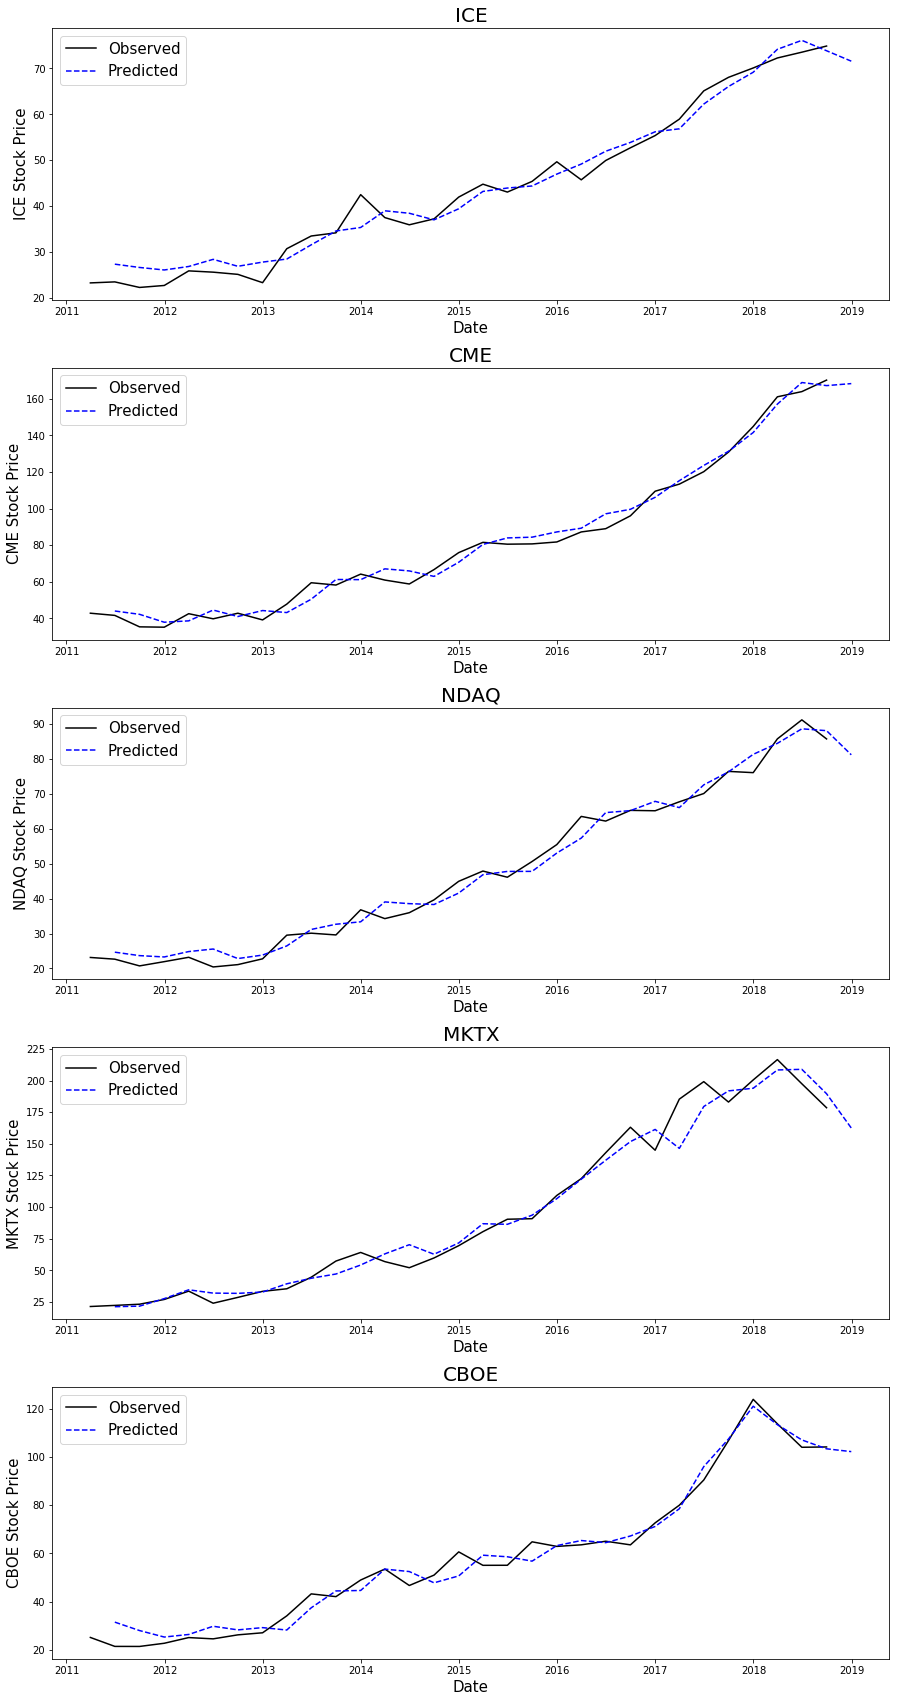

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15, 30))
fig.subplots_adjust(hspace=.25)
ax1.plot(ICE_prediction.Date, ICE_prediction.ICE_Avg_Price, 'k')
ax1.plot(ICE_prediction.Date, ICE_prediction.ICE_Prediction, 'b--')
ax2.plot(CME_prediction.Date, CME_prediction.CME_Avg_Price, 'k')
ax2.plot(CME_prediction.Date, CME_prediction.CME_Prediction, 'b--')
ax3.plot(NDAQ_prediction.Date, NDAQ_prediction.NDAQ_Avg_Price, 'k')
ax3.plot(NDAQ_prediction.Date, NDAQ_prediction.NDAQ_Prediction, 'b--')
ax4.plot(MKTX_prediction.Date, MKTX_prediction.MKTX_Avg_Price, 'k')
ax4.plot(MKTX_prediction.Date, MKTX_prediction.MKTX_Prediction, 'b--')
ax5.plot(CBOE_prediction.Date, CBOE_prediction.CBOE_Avg_Price, 'k')
ax5.plot(CBOE_prediction.Date, CBOE_prediction.CBOE_Prediction, 'b--')
ax1.set_title('ICE', fontsize = 20)
ax1.set_xlabel('Date', fontsize = 15)
ax1.set_ylabel('ICE Stock Price', fontsize = 15)
ax2.set_title('CME', fontsize = 20)
ax2.set_xlabel('Date', fontsize = 15)
ax2.set_ylabel('CME Stock Price', fontsize = 15)
ax3.set_title('NDAQ', fontsize = 20)
ax3.set_xlabel('Date', fontsize = 15)
ax3.set_ylabel('NDAQ Stock Price', fontsize = 15)
ax4.set_title('MKTX', fontsize = 20)
ax4.set_xlabel('Date', fontsize = 15)
ax4.set_ylabel('MKTX Stock Price', fontsize = 15)
ax5.set_title('CBOE', fontsize = 20)
ax5.set_xlabel('Date', fontsize = 15)
ax5.set_ylabel('CBOE Stock Price', fontsize = 15)
ax1.legend(['Observed', 'Predicted'], fontsize = 15, loc = 'upper left')
ax2.legend(['Observed', 'Predicted'], fontsize = 15, loc = 'upper left')
ax3.legend(['Observed', 'Predicted'], fontsize = 15, loc = 'upper left')
ax4.legend(['Observed', 'Predicted'], fontsize = 15, loc = 'upper left')
ax5.legend(['Observed', 'Predicted'], fontsize = 15, loc = 'upper left')
plt.show()

From the graphs, we can see that the predicted values are very close to the observed values. To demonstrate that the model is statistically significant, I calculate the accuracy score for each stock, and these scores are displayed in the following table:

In [6]:
accuracy_table = pd.DataFrame([ICE_accuracy_score, CME_accuracy_score, NDAQ_accuracy_score, MKTX_accuracy_score, CBOE_accuracy_score], index = ['ICE', 'CME', 'NDAQ', 'MKTX', 'CBOE'], columns = ['Accuracy Score'])
accuracy_table

,Accuracy Score
ICE,0.969375
CME,0.972160
NDAQ,0.978562
MKTX,0.982731
CBOE,0.961198


### 2. Predicting Highest and Lowest Stock Price of the Next Quarter

At this point, I have to mention several points to elucidate the mechanism of the second-half of this notebook. Firstly, estimating the future average stock prices might not be very useful in real-life investment because profitability is not determined by the average prices. Instead, people pay more attention to the highest and lowest price of a stock within a given period. The highest price helps us estimate how much we can benefit from buying shares of a stock now while the lowest price informs us of the risk of that stock. Therefore, in this section, I create a model to predict the highest and lowest price of a stock in the next quarter. Secondly, only considering the data of different individual stocks in the industry might be insufficient because the performance of the overall stock market and the economy is also important. Thus, I also add explanatory variables about the stock market and the economy in general in this section. The new model can be expressed by the following equation:

#### $HP_{i,t} = \beta_0 + \beta_1 {PE}_{i,t-1} + \beta_2 {PB}_{i,t-1} + \beta_3 {ROA}_{i,t-1} + \beta_4 {EVEBITDA}_{i,t-1} + \beta_5 {DJI}_{t-1} + \beta_6 {SP}_{t-1} + \beta_7 {IR}_{t-1} + \beta_8 {UR}_{t-1} + HP_{M,t-1}' \gamma + \varepsilon$
#### $LP_{i,t} = \beta_0 + \beta_1 {PE}_{i,t-1} + \beta_2 {PB}_{i,t-1} + \beta_3 {ROA}_{i,t-1} + \beta_4 {EVEBITDA}_{i,t-1} + \beta_5 {DJI}_{t-1} + \beta_6 {SP}_{t-1} + \beta_7 {IR}_{t-1} + \beta_8 {UR}_{t-1} + LP_{M,t-1}' \gamma + \varepsilon$

where $HP_{i,t}$ is the explained highest stock price (of company $i$) in quarter $t$; $LP_{i,t}$ is the explained lowest stock price (of company $i$) in quarter $t$; $HP_M$ is the vector of the prices of the top five stocks (in terms of market capitalization) in the industry; $LP_M$ is the vector of the prices of the top five stocks (in terms of market capitalization) in the industry; $DJI$ is the Dow Jones Index; $SP$ is the S&P 500 Index; $IR$ is the effective federal funds rate; $UR$ is the unemployment rate; $\varepsilon$ is the error term; all explanatory variables have a one-quarter lag in time so that people can use this equation with current data to predict the average stock prices in the near future.

Let $i$ be ICE, CME, NDAQ, MKTX and CBOE respectiely. The predictions of average stock prices are shown below:

In [7]:
ICE_Plist = pd.read_excel('Financial_Data.xlsx', sheet_name = 'ICE_Price')
CME_Plist = pd.read_excel('Financial_Data.xlsx', sheet_name = 'CME_Price')
NDAQ_Plist = pd.read_excel('Financial_Data.xlsx', sheet_name = 'NDAQ_Price')
MKTX_Plist = pd.read_excel('Financial_Data.xlsx', sheet_name = 'MKTX_Price')
CBOE_Plist = pd.read_excel('Financial_Data.xlsx', sheet_name = 'CBOE_Price')
Market = pd.read_excel('Financial_Data.xlsx', sheet_name = 'Market_Data')
Economy1 = pd.read_excel('Financial_Data.xlsx', sheet_name = 'Economy_Data_1')
Economy2 = pd.read_excel('Financial_Data.xlsx', sheet_name = 'Economy_Data_2')
ICE_Plist['Quarter'] = pd.PeriodIndex(ICE_Plist.Date, freq = 'Q')
ICE_HPrice = ICE_Plist['High'].groupby(ICE_Plist['Quarter']).max()
ICE_LPrice = ICE_Plist['Low'].groupby(ICE_Plist['Quarter']).min()
CME_Plist['Quarter'] = pd.PeriodIndex(CME_Plist.Date, freq = 'Q')
CME_HPrice = CME_Plist['High'].groupby(CME_Plist['Quarter']).max()
CME_LPrice = CME_Plist['Low'].groupby(CME_Plist['Quarter']).min()
NDAQ_Plist['Quarter'] = pd.PeriodIndex(NDAQ_Plist.Date, freq = 'Q')
NDAQ_HPrice = NDAQ_Plist['High'].groupby(NDAQ_Plist['Quarter']).max()
NDAQ_LPrice = NDAQ_Plist['Low'].groupby(NDAQ_Plist['Quarter']).min()
MKTX_Plist['Quarter'] = pd.PeriodIndex(MKTX_Plist.Date, freq = 'Q')
MKTX_HPrice = MKTX_Plist['High'].groupby(MKTX_Plist['Quarter']).max()
MKTX_LPrice = MKTX_Plist['Low'].groupby(MKTX_Plist['Quarter']).min()
CBOE_Plist['Quarter'] = pd.PeriodIndex(CBOE_Plist.Date, freq = 'Q')
CBOE_HPrice = CBOE_Plist['High'].groupby(CBOE_Plist['Quarter']).max()
CBOE_LPrice = CBOE_Plist['Low'].groupby(CBOE_Plist['Quarter']).min()
Market1 = Market.copy()
Market1 = Market1.replace(0, np.nan).dropna()
Market1 = Market1.replace(43454, pd.Timestamp('2018-12-20 00:00:00'))
Market1['Quarter'] = pd.PeriodIndex(Market1.Date, freq = 'Q')
Market1_Mean = Market1.groupby(Market1['Quarter']).mean()
HPriceMerge = pd.concat([ICE_HPrice, CME_HPrice, NDAQ_HPrice, MKTX_HPrice, CBOE_HPrice], axis = 1)
HPriceMerge.columns = ['ICE_HPrice', 'CME_HPrice', 'NDAQ_HPrice', 'MKTX_HPrice', 'CBOE_HPrice']
HPriceMerge = HPriceMerge.reset_index()
HPriceMerge = HPriceMerge.merge(Market1_Mean.reset_index(), on = 'Quarter', how = 'inner')
LPriceMerge = pd.concat([ICE_LPrice, CME_LPrice, NDAQ_LPrice, MKTX_LPrice, CBOE_LPrice], axis = 1)
LPriceMerge.columns = ['ICE_LPrice', 'CME_LPrice', 'NDAQ_LPrice', 'MKTX_LPrice', 'CBOE_LPrice']
LPriceMerge = LPriceMerge.reset_index()
LPriceMerge = LPriceMerge.merge(Market1_Mean.reset_index(), on = 'Quarter', how = 'inner')
ICE['Quarter'] = pd.PeriodIndex(ICE['Date'], freq = 'Q')
CME['Quarter'] = pd.PeriodIndex(CME['Date'], freq = 'Q')
NDAQ['Quarter'] = pd.PeriodIndex(NDAQ['Date'], freq = 'Q')
MKTX['Quarter'] = pd.PeriodIndex(MKTX['Date'], freq = 'Q')
CBOE['Quarter'] = pd.PeriodIndex(CBOE['Date'], freq = 'Q')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [8]:
ICEa = ICE.copy()
ICEa = ICEa.merge(HPriceMerge, on = 'Quarter', how = 'inner')
ICEb = ICEa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
ICEa['Price'] = ICEa['ICE_HPrice'].shift(1)
temp = HPriceMerge[HPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
ICEa['Price'][0] = temp['ICE_HPrice']
Quarter = ICEa.Quarter
ICEa = ICEa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = ICEa['Price']
X = ICEa[ICEa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(ICEb), index=Quarter, columns=['ICE_Prediction']).reset_index()
ICE_accuracy_score_H = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
ICE_prediction_H = prediction.merge(HPriceMerge[['Quarter', 'ICE_HPrice']], on = 'Quarter', how = 'outer')
ICEa = ICE.copy()
ICEa = ICEa.merge(LPriceMerge, on = 'Quarter', how = 'inner')
ICEb = ICEa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
ICEa['Price'] = ICEa['ICE_LPrice'].shift(1)
temp = LPriceMerge[LPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
ICEa['Price'][0] = temp['ICE_LPrice']
Quarter = ICEa.Quarter
ICEa = ICEa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = ICEa['Price']
X = ICEa[ICEa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(ICEb), index=Quarter, columns=['ICE_Prediction']).reset_index()
ICE_accuracy_score_L = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
ICE_prediction_L = prediction.merge(LPriceMerge[['Quarter', 'ICE_LPrice']], on = 'Quarter', how = 'outer')
CMEa = CME.copy()
CMEa = CMEa.merge(HPriceMerge, on = 'Quarter', how = 'inner')
CMEb = CMEa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
CMEa['Price'] = CMEa['CME_HPrice'].shift(1)
temp = HPriceMerge[HPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
CMEa['Price'][0] = temp['CME_HPrice']
Quarter = CMEa.Quarter
CMEa = CMEa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = CMEa['Price']
X = CMEa[CMEa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(CMEb), index=Quarter, columns=['CME_Prediction']).reset_index()
CME_accuracy_score_H = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
CME_prediction_H = prediction.merge(HPriceMerge[['Quarter', 'CME_HPrice']], on = 'Quarter', how = 'outer')
CMEa = CME.copy()
CMEa = CMEa.merge(LPriceMerge, on = 'Quarter', how = 'inner')
CMEb = CMEa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
CMEa['Price'] = CMEa['CME_LPrice'].shift(1)
temp = LPriceMerge[LPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
CMEa['Price'][0] = temp['CME_LPrice']
Quarter = CMEa.Quarter
CMEa = CMEa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = CMEa['Price']
X = CMEa[CMEa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(CMEb), index=Quarter, columns=['CME_Prediction']).reset_index()
CME_accuracy_score_L = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
CME_prediction_L = prediction.merge(LPriceMerge[['Quarter', 'CME_LPrice']], on = 'Quarter', how = 'outer')
NDAQa = NDAQ.copy()
NDAQa = NDAQa.merge(HPriceMerge, on = 'Quarter', how = 'inner')
NDAQb = NDAQa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
NDAQa['Price'] = NDAQa['NDAQ_HPrice'].shift(1)
temp = HPriceMerge[HPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
NDAQa['Price'][0] = temp['NDAQ_HPrice']
Quarter = NDAQa.Quarter
NDAQa = NDAQa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = NDAQa['Price']
X = NDAQa[NDAQa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(NDAQb), index=Quarter, columns=['NDAQ_Prediction']).reset_index()
NDAQ_accuracy_score_H = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
NDAQ_prediction_H = prediction.merge(HPriceMerge[['Quarter', 'NDAQ_HPrice']], on = 'Quarter', how = 'outer')
NDAQa = NDAQ.copy()
NDAQa = NDAQa.merge(LPriceMerge, on = 'Quarter', how = 'inner')
NDAQb = NDAQa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
NDAQa['Price'] = NDAQa['NDAQ_LPrice'].shift(1)
temp = LPriceMerge[LPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
NDAQa['Price'][0] = temp['NDAQ_LPrice']
Quarter = NDAQa.Quarter
NDAQa = NDAQa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = NDAQa['Price']
X = NDAQa[NDAQa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(NDAQb), index=Quarter, columns=['NDAQ_Prediction']).reset_index()
NDAQ_accuracy_score_L = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
NDAQ_prediction_L = prediction.merge(LPriceMerge[['Quarter', 'NDAQ_LPrice']], on = 'Quarter', how = 'outer')
MKTXa = MKTX.copy()
MKTXa = MKTXa.merge(HPriceMerge, on = 'Quarter', how = 'inner')
MKTXb = MKTXa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
MKTXa['Price'] = MKTXa['MKTX_HPrice'].shift(1)
temp = HPriceMerge[HPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
MKTXa['Price'][0] = temp['MKTX_HPrice']
Quarter = MKTXa.Quarter
MKTXa = MKTXa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = MKTXa['Price']
X = MKTXa[MKTXa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(MKTXb), index=Quarter, columns=['MKTX_Prediction']).reset_index()
MKTX_accuracy_score_H = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
MKTX_prediction_H = prediction.merge(HPriceMerge[['Quarter', 'MKTX_HPrice']], on = 'Quarter', how = 'outer')
MKTXa = MKTX.copy()
MKTXa = MKTXa.merge(LPriceMerge, on = 'Quarter', how = 'inner')
MKTXb = MKTXa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
MKTXa['Price'] = MKTXa['MKTX_LPrice'].shift(1)
temp = LPriceMerge[LPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
MKTXa['Price'][0] = temp['MKTX_LPrice']
Quarter = MKTXa.Quarter
MKTXa = MKTXa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = MKTXa['Price']
X = MKTXa[MKTXa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(MKTXb), index=Quarter, columns=['MKTX_Prediction']).reset_index()
MKTX_accuracy_score_L = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
MKTX_prediction_L = prediction.merge(LPriceMerge[['Quarter', 'MKTX_LPrice']], on = 'Quarter', how = 'outer')
CBOEa = CBOE.copy()
CBOEa = CBOEa.merge(HPriceMerge, on = 'Quarter', how = 'inner')
CBOEb = CBOEa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
CBOEa['Price'] = CBOEa['CBOE_HPrice'].shift(1)
temp = HPriceMerge[HPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
CBOEa['Price'][0] = temp['CBOE_HPrice']
Quarter = CBOEa.Quarter
CBOEa = CBOEa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = CBOEa['Price']
X = CBOEa[CBOEa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(CBOEb), index=Quarter, columns=['CBOE_Prediction']).reset_index()
CBOE_accuracy_score_H = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
CBOE_prediction_H = prediction.merge(HPriceMerge[['Quarter', 'CBOE_HPrice']], on = 'Quarter', how = 'outer')
CBOEa = CBOE.copy()
CBOEa = CBOEa.merge(LPriceMerge, on = 'Quarter', how = 'inner')
CBOEb = CBOEa.copy().drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
CBOEa['Price'] = CBOEa['CBOE_LPrice'].shift(1)
temp = LPriceMerge[LPriceMerge.Quarter == pd.Period('2018Q4', 'Q-DEC')]
CBOEa['Price'][0] = temp['CBOE_LPrice']
Quarter = CBOEa.Quarter
CBOEa = CBOEa.drop(columns = ['Date', 'Stock_Name', 'Avg_Stock_Price', 'Quarter'])
y = CBOEa['Price']
X = CBOEa[CBOEa.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = rs)
clf = linear_model.Lasso(alpha=1)
Lasso_model = clf.fit(X_train, y_train)
accuracy_score = Lasso_model.score(X_test, y_test)
prediction = pd.DataFrame(Lasso_model.predict(CBOEb), index=Quarter, columns=['CBOE_Prediction']).reset_index()
CBOE_accuracy_score_L = accuracy_score
prediction.Quarter = prediction.Quarter.shift(1)
prediction.Quarter.iloc[0] = pd.Period('2018Q4', 'Q-DEC')
CBOE_prediction_L = prediction.merge(LPriceMerge[['Quarter', 'CBOE_LPrice']], on = 'Quarter', how = 'outer')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A v

In [9]:
ICE_HL = pd.merge(ICE_prediction_H, ICE_prediction_L, on ='Quarter', how='inner').rename(columns = {'ICE_Prediction_x': 'ICE_Prediction_H', 'ICE_Prediction_y': 'ICE_Prediction_L'}).sort_values('Quarter').reset_index(drop=True)
CME_HL = pd.merge(CME_prediction_H, CME_prediction_L, on ='Quarter', how='inner').rename(columns = {'CME_Prediction_x': 'CME_Prediction_H', 'CME_Prediction_y': 'CME_Prediction_L'}).sort_values('Quarter').reset_index(drop=True)
NDAQ_HL = pd.merge(NDAQ_prediction_H, NDAQ_prediction_L, on ='Quarter', how='inner').rename(columns = {'NDAQ_Prediction_x': 'NDAQ_Prediction_H', 'NDAQ_Prediction_y': 'NDAQ_Prediction_L'}).sort_values('Quarter').reset_index(drop=True)
MKTX_HL = pd.merge(MKTX_prediction_H, MKTX_prediction_L, on ='Quarter', how='inner').rename(columns = {'MKTX_Prediction_x': 'MKTX_Prediction_H', 'MKTX_Prediction_y': 'MKTX_Prediction_L'}).sort_values('Quarter').reset_index(drop=True)
CBOE_HL = pd.merge(CBOE_prediction_H, CBOE_prediction_L, on ='Quarter', how='inner').rename(columns = {'CBOE_Prediction_x': 'CBOE_Prediction_H', 'CBOE_Prediction_y': 'CBOE_Prediction_L'}).sort_values('Quarter').reset_index(drop=True)
ICE_HL.index = ICE_HL.index * 0.25 + 2011
CME_HL.index = CME_HL.index * 0.25 + 2011
NDAQ_HL.index = NDAQ_HL.index * 0.25 + 2011
MKTX_HL.index = MKTX_HL.index * 0.25 + 2011
CBOE_HL.index = CBOE_HL.index * 0.25 + 2011

Here it is optional to set a value of "alpha". "alpha" here is different from that of the previous section. Here it shrinks the interval between the highest and lowest price of a stock within a given quarter so that we can make sure that the predicted highest price is smaller than the observed highest price. Otherwise, we might lose money because the predicted highest price has a probability of not being reached in that quarter. "alpha" ranges from 0 to 0.5. 0 means that no shrinking is used while 0.5 means that you are so conservative that you treat the highest price and the lowest price as the same price (the mean of the two prices). In this section, I set "alpha" to be 0.

In [10]:
alpha = 0

In [11]:
ICE_interval = ICE_HL.ICE_Prediction_H - ICE_HL.ICE_Prediction_L
ICE_HL.ICE_Pred_H = ICE_HL.ICE_Prediction_H - alpha*ICE_interval
ICE_HL.ICE_Pred_L = ICE_HL.ICE_Prediction_L + 0*ICE_interval
CME_interval = CME_HL.CME_Prediction_H - CME_HL.CME_Prediction_L
CME_HL.CME_Pred_H = CME_HL.CME_Prediction_H - alpha*CME_interval
CME_HL.CME_Pred_L = CME_HL.CME_Prediction_L + 0*CME_interval
NDAQ_interval = NDAQ_HL.NDAQ_Prediction_H - NDAQ_HL.NDAQ_Prediction_L
NDAQ_HL.NDAQ_Pred_H = NDAQ_HL.NDAQ_Prediction_H - alpha*NDAQ_interval
NDAQ_HL.NDAQ_Pred_L = NDAQ_HL.NDAQ_Prediction_L + 0*NDAQ_interval
MKTX_interval = MKTX_HL.MKTX_Prediction_H - MKTX_HL.MKTX_Prediction_L
MKTX_HL.MKTX_Pred_H = MKTX_HL.MKTX_Prediction_H - alpha*MKTX_interval
MKTX_HL.MKTX_Pred_L = MKTX_HL.MKTX_Prediction_L + 0*MKTX_interval
CBOE_interval = CBOE_HL.CBOE_Prediction_H - CBOE_HL.CBOE_Prediction_L
CBOE_HL.CBOE_Pred_H = CBOE_HL.CBOE_Prediction_H - alpha*CBOE_interval
CBOE_HL.CBOE_Pred_L = CBOE_HL.CBOE_Prediction_L + 0*CBOE_interval

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.htm

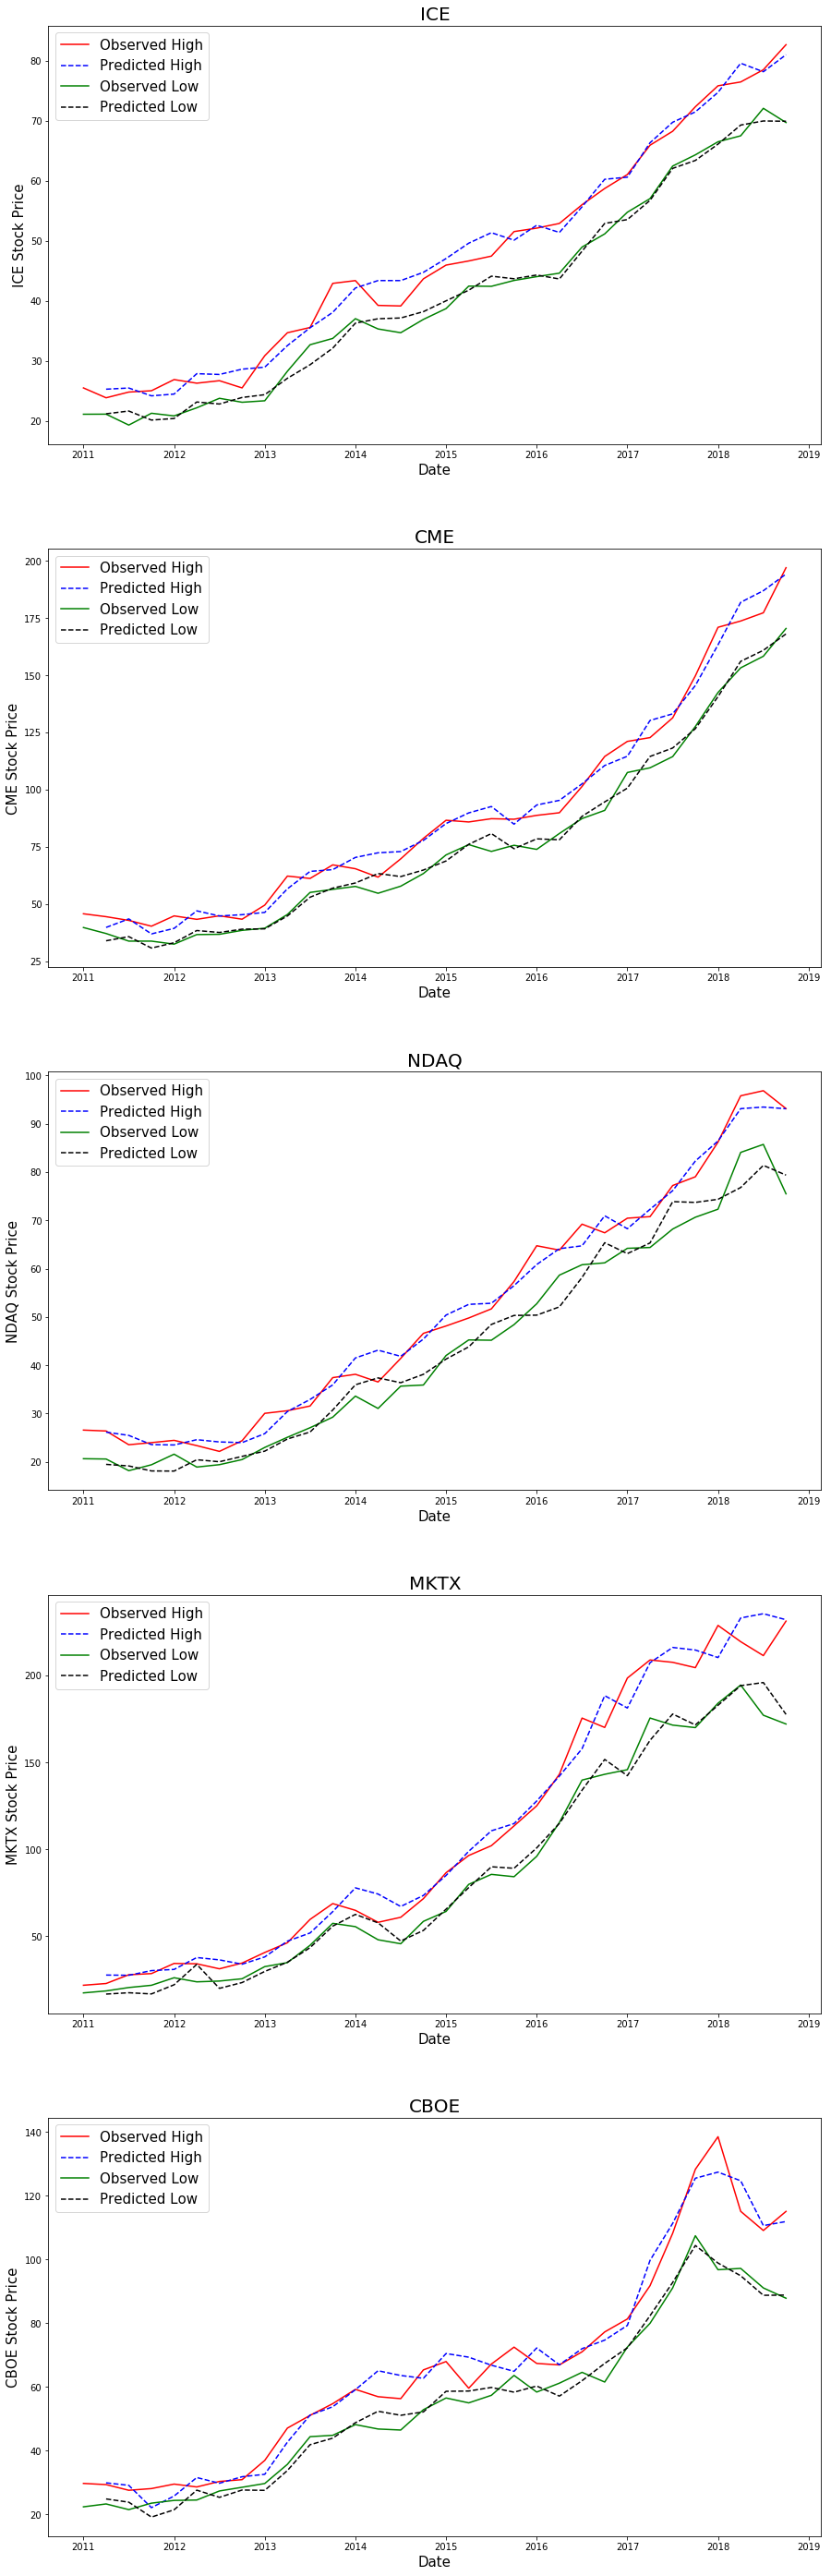

In [12]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15, 50))
fig.subplots_adjust(hspace=.25)
ax1.plot(ICE_HL.index, ICE_HL.ICE_HPrice, 'r')
ax1.plot(ICE_HL.index, ICE_HL.ICE_Pred_H, 'b--')
ax1.plot(ICE_HL.index, ICE_HL.ICE_LPrice, 'g')
ax1.plot(ICE_HL.index, ICE_HL.ICE_Pred_L, 'k--')
ax2.plot(CME_HL.index, CME_HL.CME_HPrice, 'r')
ax2.plot(CME_HL.index, CME_HL.CME_Pred_H, 'b--')
ax2.plot(CME_HL.index, CME_HL.CME_LPrice, 'g')
ax2.plot(CME_HL.index, CME_HL.CME_Pred_L, 'k--')
ax3.plot(NDAQ_HL.index, NDAQ_HL.NDAQ_HPrice, 'r')
ax3.plot(NDAQ_HL.index, NDAQ_HL.NDAQ_Pred_H, 'b--')
ax3.plot(NDAQ_HL.index, NDAQ_HL.NDAQ_LPrice, 'g')
ax3.plot(NDAQ_HL.index, NDAQ_HL.NDAQ_Pred_L, 'k--')
ax4.plot(MKTX_HL.index, MKTX_HL.MKTX_HPrice, 'r')
ax4.plot(MKTX_HL.index, MKTX_HL.MKTX_Pred_H, 'b--')
ax4.plot(MKTX_HL.index, MKTX_HL.MKTX_LPrice, 'g')
ax4.plot(MKTX_HL.index, MKTX_HL.MKTX_Pred_L, 'k--')
ax5.plot(CBOE_HL.index, CBOE_HL.CBOE_HPrice, 'r')
ax5.plot(CBOE_HL.index, CBOE_HL.CBOE_Pred_H, 'b--')
ax5.plot(CBOE_HL.index, CBOE_HL.CBOE_LPrice, 'g')
ax5.plot(CBOE_HL.index, CBOE_HL.CBOE_Pred_L, 'k--')
ax1.set_title('ICE', fontsize = 20)
ax1.set_xlabel('Date', fontsize = 15)
ax1.set_ylabel('ICE Stock Price', fontsize = 15)
ax2.set_title('CME', fontsize = 20)
ax2.set_xlabel('Date', fontsize = 15)
ax2.set_ylabel('CME Stock Price', fontsize = 15)
ax3.set_title('NDAQ', fontsize = 20)
ax3.set_xlabel('Date', fontsize = 15)
ax3.set_ylabel('NDAQ Stock Price', fontsize = 15)
ax4.set_title('MKTX', fontsize = 20)
ax4.set_xlabel('Date', fontsize = 15)
ax4.set_ylabel('MKTX Stock Price', fontsize = 15)
ax5.set_title('CBOE', fontsize = 20)
ax5.set_xlabel('Date', fontsize = 15)
ax5.set_ylabel('CBOE Stock Price', fontsize = 15)
ax1.legend(['Observed High', 'Predicted High', 'Observed Low', 'Predicted Low'], fontsize = 15, loc = 'upper left')
ax2.legend(['Observed High', 'Predicted High', 'Observed Low', 'Predicted Low'], fontsize = 15, loc = 'upper left')
ax3.legend(['Observed High', 'Predicted High', 'Observed Low', 'Predicted Low'], fontsize = 15, loc = 'upper left')
ax4.legend(['Observed High', 'Predicted High', 'Observed Low', 'Predicted Low'], fontsize = 15, loc = 'upper left')
ax5.legend(['Observed High', 'Predicted High', 'Observed Low', 'Predicted Low'], fontsize = 15, loc = 'upper left')
plt.show()

The five graphs actually show that the predictions are close to the observed data, but they are not perfect. Therefore, when we are creating real-life stock investment strategies, it is necessary to set "alpha" to be a positive value so that we can ensure that the predicted highest price of a stock within a given quarter can be reached.

Finally, let's take a look at the accuracy scores of the predictions. They are very high, but still far from perfect.

In [13]:
accuracy_matrix = pd.DataFrame(np.array([[ICE_accuracy_score_H, CME_accuracy_score_H, NDAQ_accuracy_score_H, MKTX_accuracy_score_H, CBOE_accuracy_score_H], [ICE_accuracy_score_L, CME_accuracy_score_L, NDAQ_accuracy_score_L, MKTX_accuracy_score_L, CBOE_accuracy_score_L]]), columns = ['ICE', 'CME', 'NDAQ', 'MKTX', 'CBOE'], index = ['High', 'Low'])
accuracy_matrix

,ICE,CME,NDAQ,MKTX,CBOE
High,0.978406,0.982578,0.988039,0.973790,0.976232
Low,0.992683,0.986863,0.972212,0.980522,0.981455
